***Punto 1***

In [ ]:
def MaximumR(theta,vo,b,g):
  R =

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image
import sympy as sp


In [2]:
import numpy as np

def tan(grados):
  return np.tan(np.deg2rad(grados))

def sen(grados):
  return np.sin(np.deg2rad(grados))

def cos(grados):
  return np.cos(np.deg2rad(grados))

def intan(grados):
  return np.rad2deg(np.arctan(grados))

def insen(grados):
  return np.rad2deg(np.arcsin(grados))

def incos(grados):
  return np.rad2deg(np.arccos(grados))

def cotan(grados):
  return 1/tan(grados)

In [3]:
import numpy as np
vo = 55
theta = 45
b = 0.005
g = 9.8
vox = vo*cos(45)
voy = vo*sen(45)
f = lambda R: (((g/b)+voy)*(R/vox)) + ((g/b**2)*np.log(1-((R*b)/vox)))

R = np.arange(300,302,0.1)

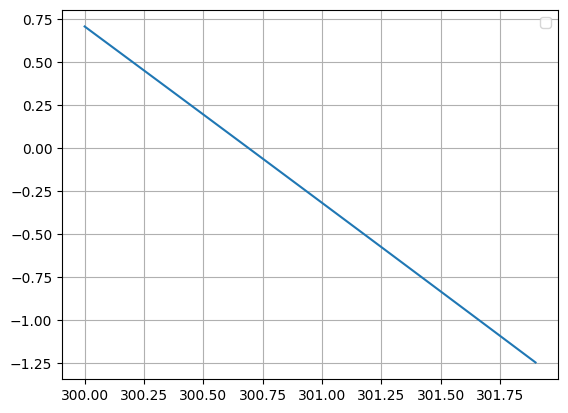

In [4]:
plt.plot(R,f(R))
plt.grid()
plt.legend()

***Punto 2***

In [7]:
def biseccion(f,a,b,N,eps):
  for i in range(N):
    if f(a)*f(b)>0:
      print("cambie los valores del intervalo")
      break

  i = 0
  while i !=N:

      p = (a+b)/2
      print (i, p, f(p))
      if f(a)*f(p)>0:
        a = p
      elif f(a)*f(p)<0:
        b = p
        #for i in range(N):
          #if abs(p-p[i-1]) < eps:
            #print(f"el cero es {p}")
            #break
          #elif abs(p - p[i-1])/abs((p)) < eps:
            #print(f"el cero es {p}")
            #break
      if abs(f(p)) < eps:
        print(f"el cero esta en {p}")
        break

      i = i+1
  return p


In [9]:
biseccion(f = lambda R: (((g/b)+voy)*(R/vox)) + ((g/b**2)*np.log(1-((R*b)/vox))),a=300.5,b=301.5,N=100,eps=1e-7)

0 301.0 -0.3164563953050674
1 300.75 -0.059477698376213084
2 300.625 0.06884732715661812
3 300.6875 0.004698507562352461
4 300.71875 -0.027386172056139912
5 300.703125 -0.011342976396917948
6 300.6953125 -0.0033220204586541513
7 300.69140625 0.0006882970410515554
8 300.693359375 -0.0013168483128538355
9 300.6923828125 -0.0003142723162454786
10 300.69189453125 0.00018701319822866935
11 300.692138671875 -6.362932981573977e-05
12 300.6920166015625 6.169200969452504e-05
13 300.69207763671875 -9.68670065049082e-07
14 300.6920471191406 3.036164889635984e-05
15 300.6920623779297 1.4696492144139484e-05
16 300.6920700073242 6.863934686407447e-06
17 300.6920738220215 2.9476523195626214e-06
18 300.6920757293701 9.89493855740875e-07
19 300.69207668304443 1.0411895345896482e-08
el cero esta en 300.69207668304443


300.69207668304443

In [10]:
optimize.bisect(f,300.5,301.5)

300.6920766931926

***Punto 3***

In [ ]:
def puntosfijos(f,p,eps,N):
  x0 = p
  i = 0
  while i<N:
    i=i+1
    p = f(x0)
    print (i, p, np.abs(p - x0) )
    if ( np.abs(p-x0) < eps ):
      break
    x0 = p
  return p

In [ ]:
puntosfijos(f,300.5,1e-7,100)

In [ ]:
def puntosfijos_values(f,p,eps,N):
  x0 = p
  i = 0
  while i<N:
    i=i+1
    p = f(x0)
    #print (i, p, np.abs(p - x0) )
    if ( np.abs(p - x0) < eps ):
      break
    x0 = p
  return p

In [ ]:
p = puntosfijos_values(f = lambda R: (((g/b)+voy)*(R/vox)) + ((g/b**2)*np.log(1-((R*b)/vox))),p=300.5,eps=1e-7,N=100)
root = 300.5 + p
root

300.6853411634223

Con la funcion que hice de punto fijo no resulto tan correcto, asi que probe con optimize para hallar la raiz por punto fijo

In [17]:
fixf = lambda R: R - f(R)
fix = optimize.fixed_point(fixf,300.5)
print(f'La Raíz por punto fijo es igual a : {fix}')

La Raíz por punto fijo es igual a : 300.6920766932434


In [11]:
def biseccion_value(f,a,b,N,eps):
  for i in range(N):
    if f(a)*f(b)>0:
      print("cambie los valores del intervalo")
      break

  i = 0
  while i !=N:

      p = (a+b)/2
      #print (i, p, f(p))
      if f(a)*f(p)>0:
        a = p
      elif f(a)*f(p)<0:
        b = p
        #for i in range(N):
          #if abs(p-p[i-1]) < eps:
            #print(f"el cero es {p}")
            #break
          #elif abs(p - p[i-1])/abs((p)) < eps:
            #print(f"el cero es {p}")
            #break
      if abs(f(p)) < eps:
        #print(f"el cero es {p}")
        break

      i = i+1
  return p


In [16]:
R_mau = biseccion_value(f = lambda R: (((g/b)+voy)*(R/vox)) + ((g/b**2)*np.log(1-((R*b)/vox))),a=300.5,b=301.5,N=100,eps=1e-7)
R_t = np.arange(0.5,R_mau,0.01)
tv = -(1/b)*np.log(1-((R_t*b)/vox))
print(f'los valores de tiempo hasta llegar a R son: {tv}')

los valores de tiempo hasta llegar a R son: [0.0128569  0.01311405 0.01337119 ... 7.88451135 7.88477882 7.88504629]


***Punto 4***

In [14]:
x = (vox/b)*(1-np.exp(-b*tv))
y = (1/b)*((g/b)+voy) * (1-np.exp(-b*tv)) - ((g/b)*tv)
x,y

(array([  0.5 ,   0.51,   0.52, ..., 300.67, 300.68, 300.69]),
 array([0.49919005, 0.50915733, 0.51912395, ..., 0.02266294, 0.01239781,
        0.00213199]))

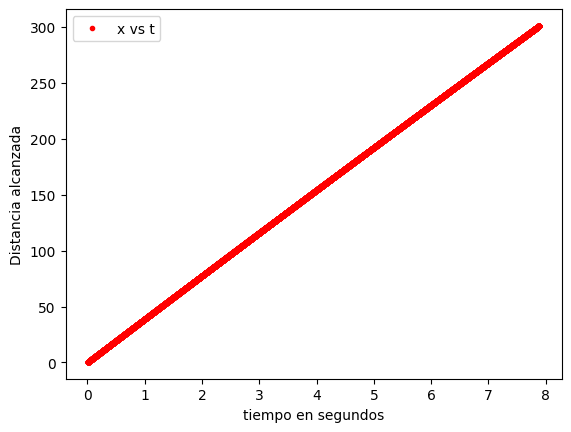

In [20]:
plt.figure()
plt.plot(tv,x,'r.', label= 'x vs t')
plt.xlabel("tiempo en segundos")
plt.ylabel("Distancia alcanzada")
plt.legend()


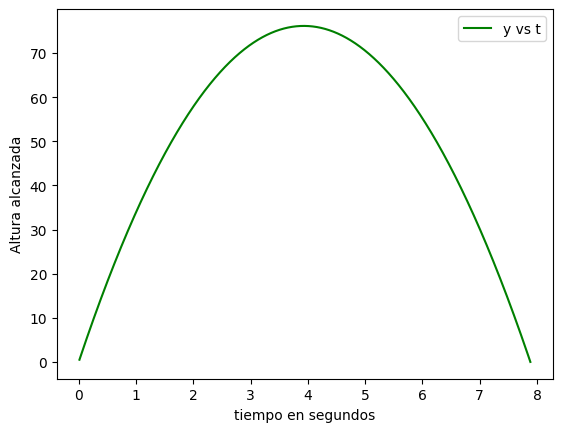

In [21]:
plt.figure()
plt.plot(tv,y,'g-',label='y vs t')
plt.xlabel("tiempo en segundos")
plt.ylabel("Altura alcanzada")
plt.legend()

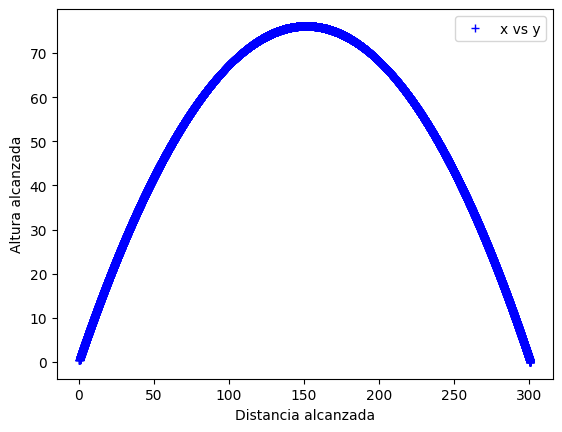

In [22]:
plt.figure()
plt.plot(x,y,'b+',label='x vs y')
plt.xlabel("Distancia alcanzada")
plt.ylabel("Altura alcanzada")
plt.legend()

*Parte 5-7*

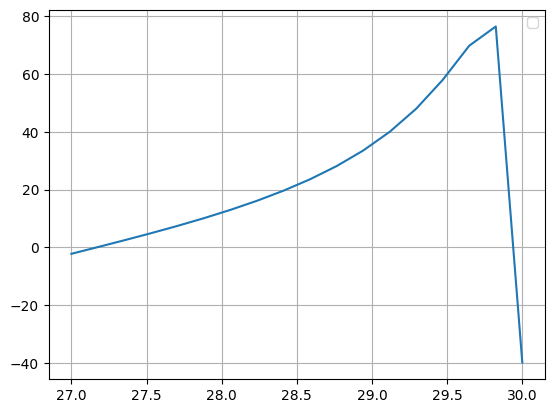

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from PIL import Image
import sympy as sp

import numpy as np
vo_n = 40
theta_n = np.arange(0,90,5)
b_n = 0.009
g = 9.8
vox = vo_n*cos(theta_n)
voy = vo_n*sen(theta_n)
f_n = lambda R: (((g/b_n)+voy)*(R/vox)) + ((g/b_n**2)*np.log(1-((R*b_n)/vox)))

R_n = np.linspace(27,30,18)

plt.plot(R_n,f_n(R_n))
plt.grid()
plt.legend()

In [329]:
def rootsangu(theta_n):
  i = 0
  while i in range(len(theta_n)):
    i = (np.arange(len(theta_n)))
    x0 = theta_n[i]+50
    vox = vo_n*cos(theta_n[i])
    voy = vo_n*sen(theta_n[i])
    F_n = lambda R : (((g/b_n)+voy)*(R/vox)) + ((g/b_n**2)*np.log(1-((R*b_n)/vox)))
    r = optimize.newton(F_n,x0)
    Time_thetas = lambda R_n: -(1/b_n)*np.log(1-((r*b_n)/vox))
    tv = optimize.fixed_point(Time_thetas,x0)
    print(f'La raiz de R en el angulo{theta_n[i]-1} es igual a : {r[i]}, y en el tiempo dado fue: {tv[i]}')
    return r,tv

In [330]:
thetasvalues = rootsangu(theta_n)

La raiz de R en el angulo[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85] es igual a : [  5.69301004  33.77175199  60.5933101   85.3630386  107.35728131
 125.94342864 140.59683554 150.91424441 156.62347196 157.58923036
 153.8150586  145.441437   132.7402454  116.10580345  96.04279794
  73.15145963  48.11039854  21.65754468], y en el tiempo dado fue: [0.14243819 0.8522042  1.55400208 2.24255732 2.91272683 3.55953487
 4.17820695 4.76420158 5.31323975 5.8213321  6.28480369 6.70031638
 7.06488878 7.37591378 7.63117363 7.82885264 7.96754741 8.04627468]


In [331]:
R_thetas,T_thetas = thetasvalues

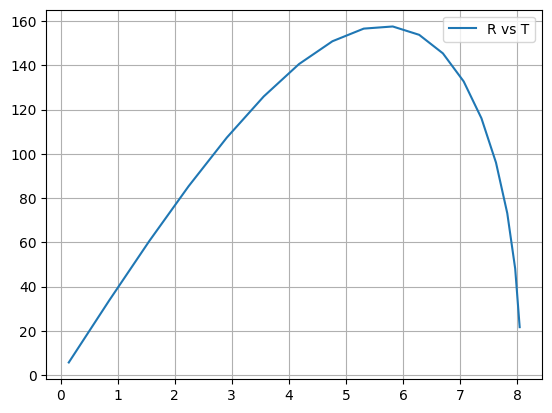

In [333]:
plt.plot(T_thetas,R_thetas, label = 'R vs T')
plt.grid()
plt.legend()

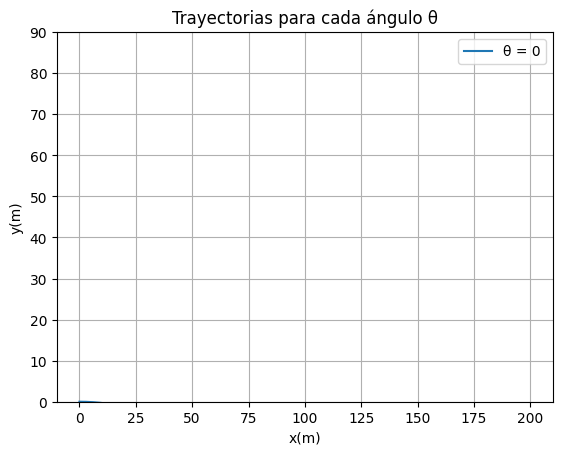

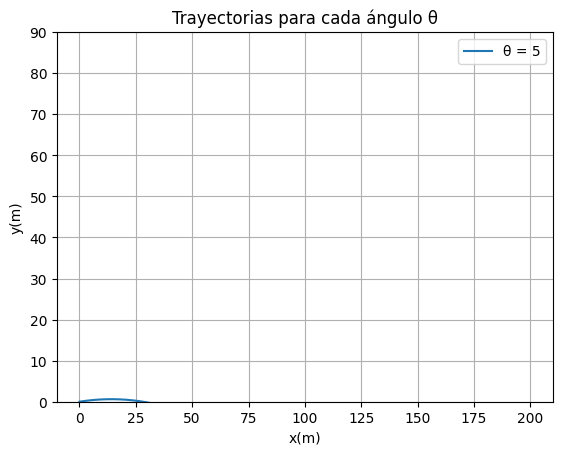

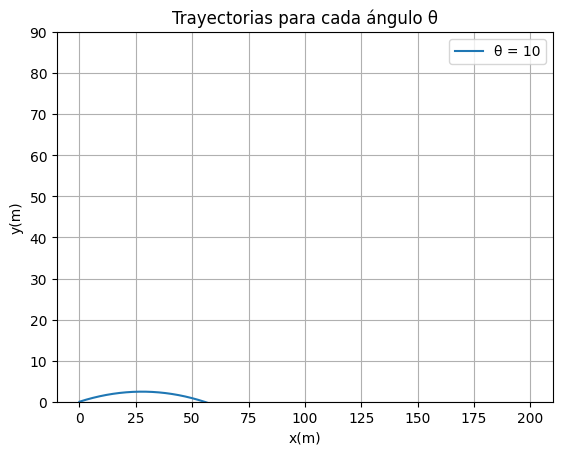

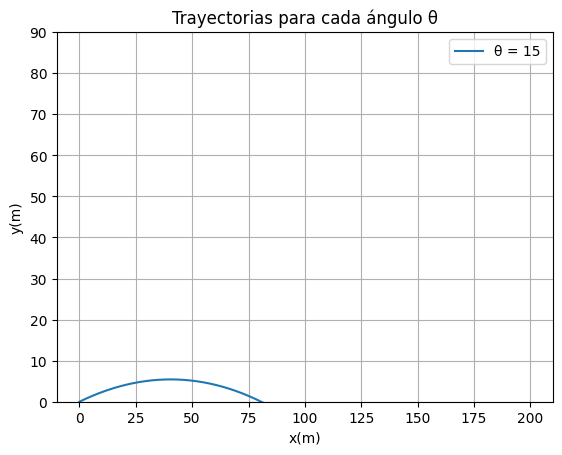

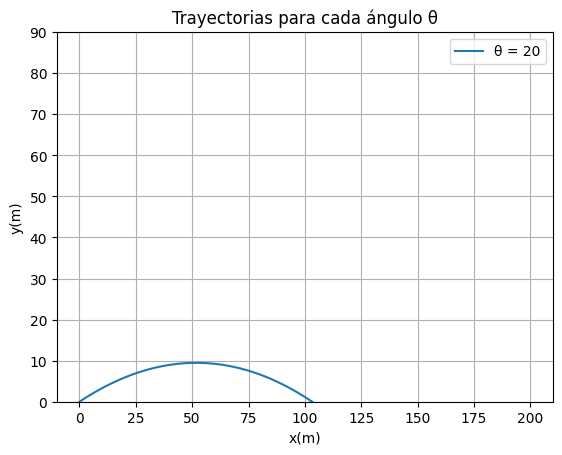

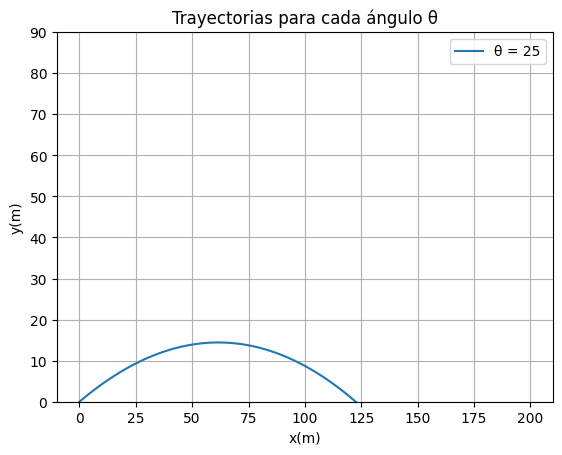

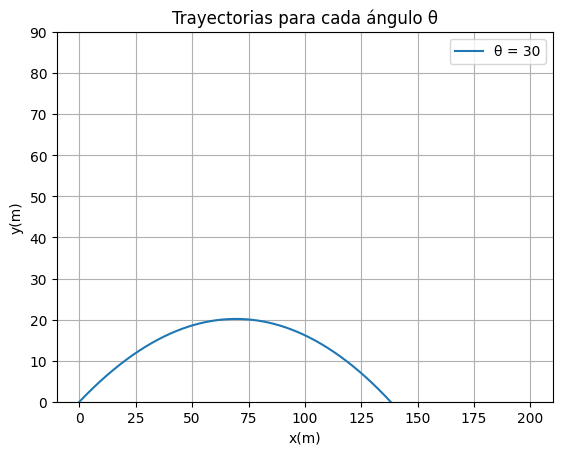

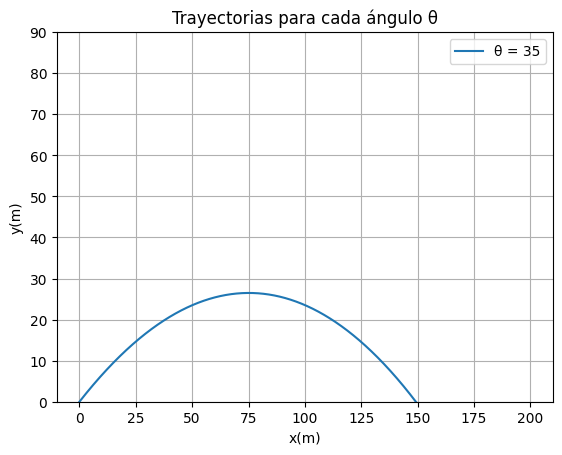

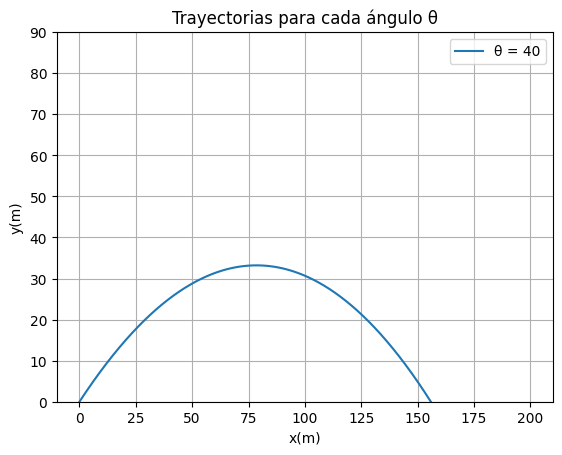

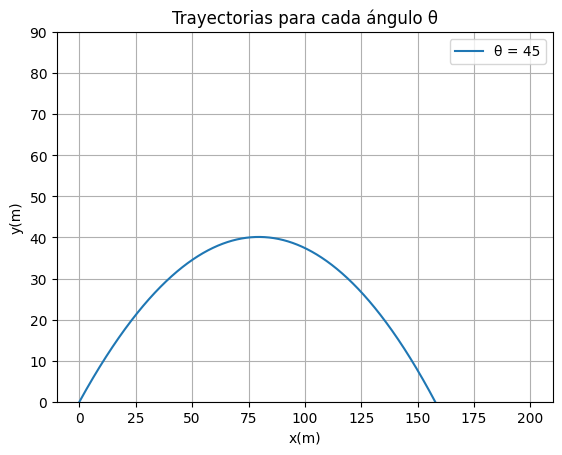

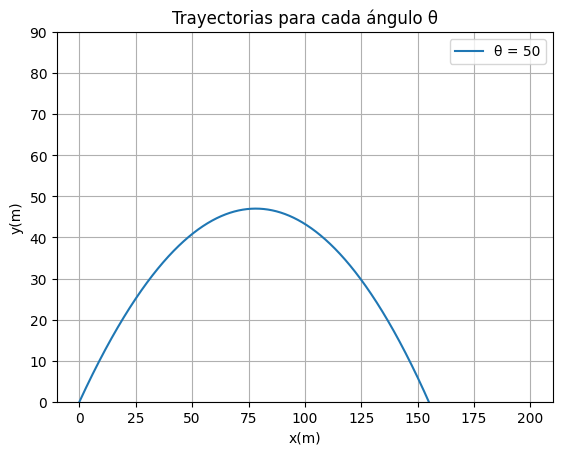

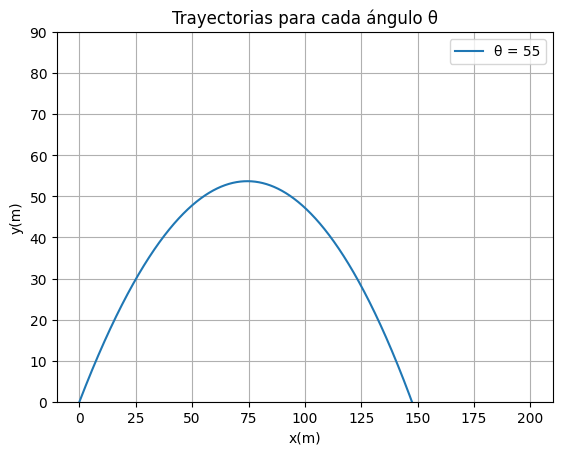

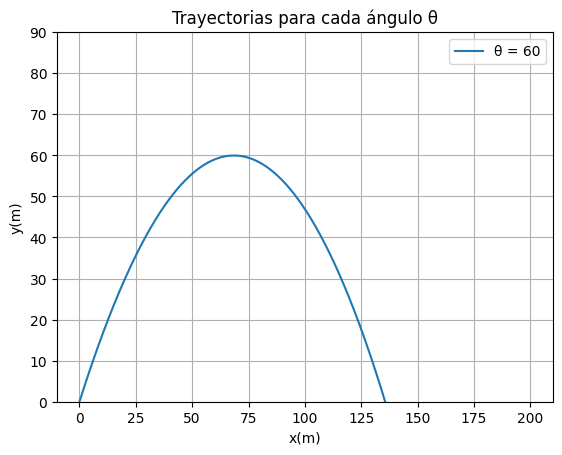

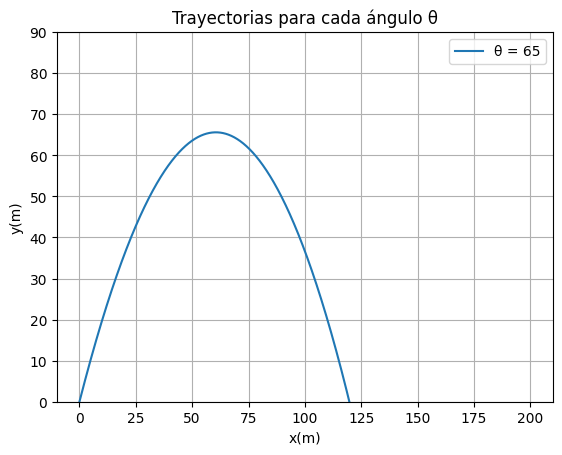

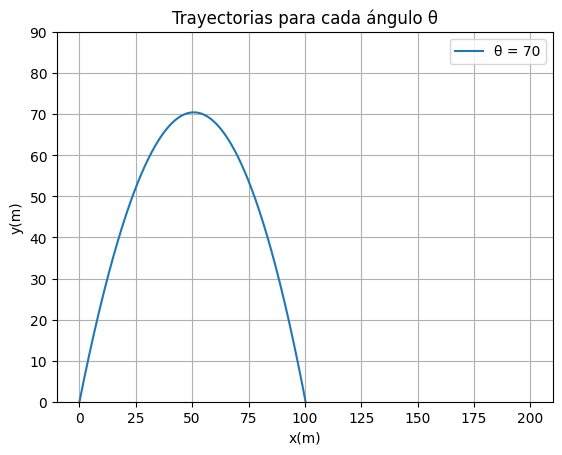

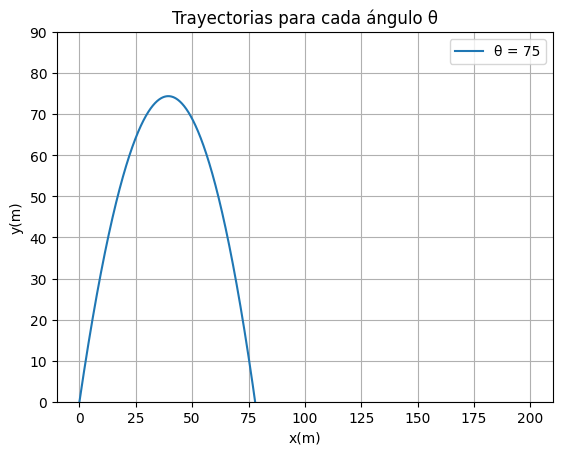

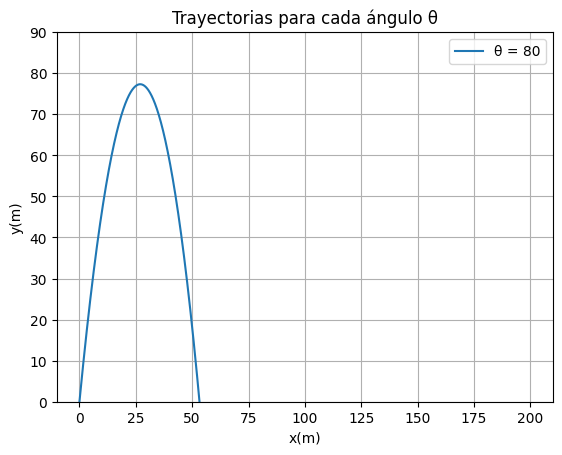

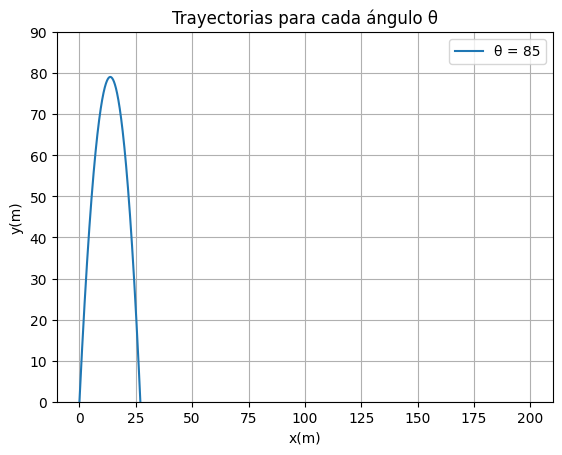

In [342]:
theta_n = np.arange(0,90,5)
R=np.linspace(0,200,10000)

for i in theta_n:
  vox = vo_n*cos(i)
  voy = vo_n*sen(i)
  plt.plot(R,f_n(R),label=f'θ = {i}')
  plt.ylim(0,90)
  plt.title("Trayectorias para cada ángulo θ")
  plt.xlabel("x(m)")
  plt.ylabel("y(m)")
  plt.legend()
  plt.grid()
  plt.show()

# residuo no terminado de usar

In [ ]:
z = f_n(R_n)
z

array([ -2.24164578,   0.08910911,   2.45062095,   4.87818687,
         7.410036  ,  10.08974066,  12.96926125,  16.11306498,
        19.60397743,  23.55178449,  28.10613086,  33.47579429,
        39.95561046,  47.95230798,  57.93365   ,  69.75684923,
        76.40632345, -39.84281786])

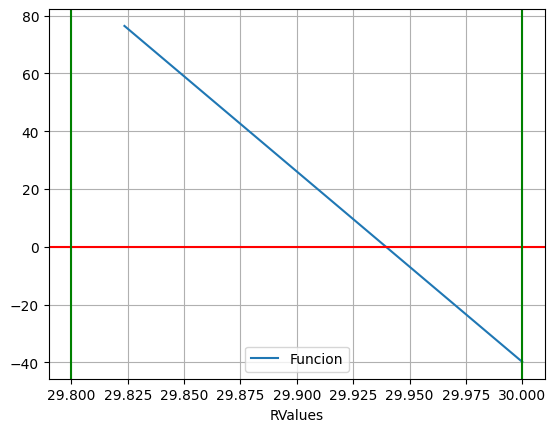

In [ ]:
data = {'RValues':R_n,'Funcion':z}
dataf = pd.DataFrame(data)

#dataf.plot.line(x='Theta Values',y='Funcion')


datafilt = dataf[dataf.RValues.between(29.8,30)]
datafilt.plot.line(x='RValues',y='Funcion')
plt.axhline(y=0,xmax = 85,color = 'r')
plt.axvline(x=29.8,ymax=80, color= 'g')
plt.axvline(x=30,ymax=80,color='g')
plt.grid()
plt.show()

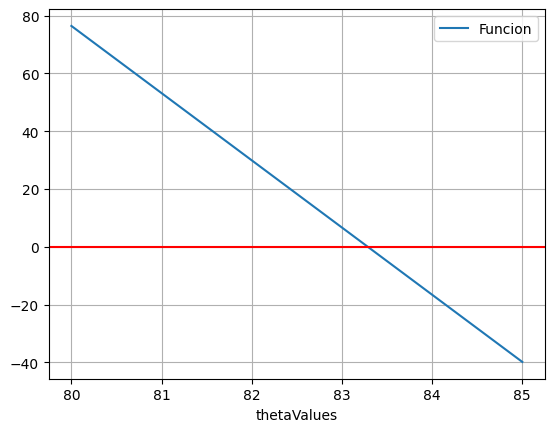

In [ ]:
data = {'thetaValues':theta_n,'Funcion':z}
dataf = pd.DataFrame(data)

#dataf.plot.line(x='Theta Values',y='Funcion')


datafilt = dataf[dataf.thetaValues.between(80,85)]
datafilt.plot.line(x='thetaValues',y='Funcion')
plt.axhline(y=0,xmax = 85,color = 'r')
#plt.axvline(x=29.8,ymax=80, color= 'g')
#plt.axvline(x=30,ymax=80,color='g')
plt.grid()
plt.show()

In [ ]:
vox_N = vo_n*cos(83)
voy_N = vo_n*sen(83)

In [ ]:
def biseccion_rtr(f,a,b,N,eps,vox):
  for i in range(N):
    if f(a)[i]*f(b)[i]>0:
      print("cambie los valores del intervalo")
      break

  i = 0
  while i !=len(vox):
    for k in range(len(vox)):
      p = (a+b)/2
      print (i, p, f(p))
      if f(a)[k]*f(p)[k]>0:
        a = p
      elif f(a)[k]*f(p)[k]<0:
        b = p
        #for i in range(N):
          #if abs(p-p[i-1]) < eps:
            #print(f"el cero es {p}")
            #break
          #elif abs(p - p[i-1])/abs((p)) < eps:
            #print(f"el cero es {p}")
            #break
      if abs(f(p)[k]) < eps:
        print(f"el cero es {p}")
        break

      i = i+1
  return p


In [ ]:
biseccion(f = lambda R: (((g/b_n)+voy)*(R/vox)) + ((g/b_n**2)*np.log(1-((R*b_n)/vox))) ,a=29.9,b=30,N=100,eps=1e-7)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
optimize.bisect(f_n,29.9,30)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
tota = np.arange(0,90,5)
R = np.linspace(0,200,10000)

for i in tota:
  x0 = i+50
  r = optimize.newton(ectraspos_y,x0,args=(g,b_n,vo_n,i))
  print(f'el cero de y para theta={i} se encuentra en {r:.4}')
  plt.plot(R,ectraspos_y(g,b_n,vo_n,i,R))

RuntimeError: Tolerance of 0.005100000000005878 reached. Failed to converge after 1 iterations, value is 50.005100000000006.

In [ ]:
for i in range(len(vox)):
  biseccion(f = lambda R: (((g/b_n)+voy)*(R/vox)) + ((g/b_n**2)*np.log(1-((R*b_n)/vox))) ,a=29.9,b=30,N=100,eps=1e-7)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
biseccion_rtr(f_n ,a=29,b=30,N=100,eps=1e-7,vox=vox)

cambie los valores del intervalo
0 29.5 [ -2.67699289  -0.11661359   2.44123262   5.0348584    7.70463016
  10.49549017  13.4600502   16.66270157  20.18539836  24.1361258
  28.66160176  33.96634229  40.33964093  48.18296933  57.96815228
  69.61616778  76.59869986 -32.56580859]
1 29.75 [ -2.72266058  -0.14075984   2.43822194   5.05288763   7.74388296
  10.55643069  13.54343424  16.76959435  20.31719168  24.29453585
  28.848598    34.1838715   40.58874881  48.46104101  58.25951965
  69.85408665  76.45206472 -36.17474844]
2 29.875 [ -2.74563992  -0.15297958   2.43656655   5.06174623   7.76334444
  10.58672358  13.58493187  16.82282327  20.38283939  24.37344826
  28.94174134  34.29218941  40.71271286  48.59924706  58.40392673
  69.97078793  76.37359756 -38.00138679]
3 29.9375 [ -2.75716596  -0.15912611   2.43570134   5.06613652   7.77303396
  10.60182567  13.60563208  16.84938336  20.415601    24.4128313
  28.98822431  34.34623667  40.7745474   48.66814261  58.47581106
  70.02857389  76.33

29.999996185302734

In [ ]:
f_n(80)

array([-1.98384216e+01, -1.29921074e+01, -6.35290878e+00,  1.64036715e-01,
        6.63353402e+00,  1.31220069e+01,  1.96868338e+01,  2.63718276e+01,
        3.31952354e+01,  4.01217889e+01,  4.69982451e+01,  5.33990389e+01,
        5.82301530e+01,  5.86029022e+01,  4.61240309e+01, -8.34401175e+00,
       -2.45028649e+02, -2.08714514e+03])

In [ ]:
x0 = np.arange(0,90,5)
optimize.newton(ectraspos_y,x0,args=(g,b_n,vo_n,i))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_zeros_py.py:468: RuntimeWarning: RMS of 0.000733651 reached
  warnings.warn(


array([3.41424969e-06, 5.00002049e+00, 1.00000376e+01, 1.50000546e+01,
       2.00000717e+01, 2.50000888e+01, 3.00001058e+01, 3.50001229e+01,
       4.00001400e+01, 4.50001571e+01, 5.00001741e+01, 5.50001912e+01,
       6.00002083e+01, 6.50002253e+01, 7.00002424e+01, 7.50002595e+01,
       8.00002766e+01, 8.50002936e+01])

In [ ]:
fixedf = lambda R: R - f_n(R)
fixer = optimize.fixed_point(fixedf,29.9)
fixer

RuntimeError: Failed to converge after 500 iterations, value is [ 3.86276975e-04  2.82301483e+01  5.53686016e+01  2.36065154e-12
 -2.65594475e-11 -3.52292094e-12 -1.67847110e-11  3.56269922e-12
 -7.38543446e-12 -6.80151692e-13  1.23396480e-12 -4.94556369e-12
  2.63020338e-12 -4.03629133e-13  2.12072396e-12 -2.46666953e-12
  2.48076377e-13  2.70241625e+01]

In [ ]:
optimize.newton(f_n,29)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.











